# COGS 108 - Final Project

## Overview
This project aims to pinpoint external factors that correspond to increased incidences of aggressive driving behavior. This project operationalizes aggressive driving as potentially dangerous acts such as excessive honking, swerving, tailgating, and fighting others. Through an exploration and analysis of multiple external factors such as the time of day, speed/weight/length of a preceding vehicle, and weather conditions, this project informs readers of the dangers associated with aggressive driving by relating the behavior to distinctly identifiable external conditions. 

## Names
* Yihao Zhou
* Zhiyang Han
* Elliott Ettore
* Miguel Silva
* Robert Brooks

## Research Question
* How would time, road condition, and preceding vehicles affect drivers' aggressiveness?

## Background and Prior Work
* “Road rage” is aggressive or angry behavior exhibited by drivers when they encounter frustrations caused by others on the road. It makes drivers lose rationality, leading to altercations, assaults and collisions that result in serious physical injuries, and sometimes even death. Strategies include excessive honking, swerving, tailgating, and attempting to fight.

* A 2019 survey conducted by the The Zebra indicates that the phenomenon of road rage is ubiquitous. According to the survey, 82% of drivers in the United States have experienced some incident of road rage or aggressive driving at least once in the past year, with 42% reporting cursing and yelling and 38% admitting to making obscene gestures towards other drivers. While aggressive driving poses dangers to drivers on the road, the same 2019 The Zebra statistics reports that only 10% of drivers will contact the police in the event they witness another driver exhibiting these behaviors. Obviously, this is an important social issue that needs to be addressed. This report will analyze the aggressive driving data collected by a user on Kaggle.com to uncover patterns of road rage and provide possible solutions to prevent incidents caused by this behavior. We have not found other data analysis projects related to road rage on Kaggle so far.

* References:
* 1)https://www.kaggle.com/veeralakrishna/aggressive-driving-data/data
* 2) https://www.thezebra.com/road-rage-statistics/

## Hypothesis
* We expect road rage incidents are most likely to happen in the evening, since that is the time of day when everyone hurries home and when visibility is limited.
* We also predict that the preceding vehicle’s speed will be negatively correlated with the likelihood of road rage because that gives less annoyance and anxiety caused by low-speed driving, whereas the loading may be positively correlated due to vision-blocking and low velocity.
* In addition, we believe poor weather conditions will result in less hazardous driving since drivers tend to pay more attention and extra-cautious for safety.

## Dataset(s)

* Dataset Name: Aggressive Driving Data
* Link to the dataset:
* https://www.kaggle.com/veeralakrishna/aggressive-driving-data/data
* Number of observations: 160,111

The ideal data set that we plan on utilizing includes statistics that involve: the time of day the accident occurred, the weather during the accident, and the preceding vehicles’ driving styles during the time of the accident. Some of the important variables included in this data set are the date and time of the data collected, the speed of the vehicle, the speed of preceding vehicles, weather details, and lighting conditions (daylight or nighttime). There are around 12,000 observed variables in the dataset. The data sets were observed and collected by a user on Kaggle. The data set is organized in 19 total variables that start with the letter V:

* V1: And time of the data collected during the trip
* V2: Length of the vehicle in centimeters
* V3: Lanes within the road (1 or 2)
* V4: Speed of the Vehicle in kph
* V5: Weight of the Vehicle in Kg
* V6: Number of Axles
* V7: ID of the Preceding vehicle in kg
* V8: Speed of the preceding vehicle in kph
* V9: Weight of the preceding vehicle in kg
* V10: Length of the preceding vehicle in cm
* V11: Time gap with the preceding vehicle in seconds
* V12: Weather details - Air Temperature
* V13: Weather details - Precipitation type (Clear, Rain, Snow)
* V14: Precipitation details
* V15: Weather details - Relative humidity
* V16: Wind Direction
* V17: Weather details - Wind Speed in m/s
* V18: Conditions of the road with respect to the weather
* V19: Lighting Conditions based on time of day

## Setup

In [1]:
# data processing & analysis packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

# import data from csv files
df_1 = pd.read_csv('aggressive-driving-data/Train_Data/Train.csv')
df_2 = pd.read_csv('aggressive-driving-data/Train_Data/Train_Vehicletravellingdata.csv')
df_3 = pd.read_csv('aggressive-driving-data/Train_Data/Train_WeatherData.csv')

In [2]:
# rename columns in explicit names
df = df_1.merge(df_2, 'outer').merge(df_3, 'outer')
df = df[['ID','DrivingStyle','V1','V2','V5','V6','V3','V4','V7','V8',
         'V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19']]

name = ['ID',
        'DrivingStyle',
        'date_time',
        'len_cm',
        'weight_kg',
        'no_axles',
        'rd_lane',
        'speed_kph',
        'preceding_vehi_id',
        'speed_preceding_vehi_kph',
        'weight_preceding_vehi_kg',
        'len_preceding_vehi_cm',
        'time_gap_btwn',
        'air_temp',
        'precipitation_typ',
        'precipitation_intensity',
        'rel_humid',
        'wind_dir',
        'wind_speed_ms',
        'rd_cond',
        'light_cond']

var = ['ID','DrivingStyle','V1','V2','V5','V6','V3','V4','V7','V8',
       'V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19']

dic = dict(zip(var,name))
df = df.rename(columns = dic)

# reorder columns
df = df[['ID',
         'DrivingStyle',
         'time_gap_btwn',
         'date_time',
         'len_cm',
         'weight_kg',
         'no_axles',
         'rd_lane',
         'speed_kph',
         'preceding_vehi_id',
         'speed_preceding_vehi_kph',
         'weight_preceding_vehi_kg',
         'len_preceding_vehi_cm',
         'air_temp',
         'precipitation_typ',
         'precipitation_intensity',
         'rel_humid',
         'wind_dir',
         'wind_speed_ms',
         'rd_cond',
         'light_cond']]
df.head()

,ID,DrivingStyle,time_gap_btwn,date_time,len_cm,weight_kg,no_axles,rd_lane,speed_kph,preceding_vehi_id,...,weight_preceding_vehi_kg,len_preceding_vehi_cm,air_temp,precipitation_typ,precipitation_intensity,rel_humid,wind_dir,wind_speed_ms,rd_cond,light_cond
0,DR_24526,2,94.0,2012-03-21 09:14:55,1265,10243,2,1,81,57227,...,16986,941,7.0,clear,None,95.0,146.0,1.0,Dry,daylight
1,DR_24526,2,11.0,2012-03-21 09:15:07,1265,10243,2,1,88,57229,...,1708,551,7.0,clear,None,95.0,124.0,0.0,Dry,daylight
2,DR_24526,2,4.0,2012-03-21 09:15:12,1265,10243,2,1,88,57230,...,22892,1698,7.0,clear,None,95.0,124.0,0.0,Dry,daylight
3,DR_24526,2,127.0,2012-03-21 09:15:48,1265,10243,2,2,84,57228,...,1945,544,7.0,clear,None,95.0,124.0,0.0,Dry,daylight
4,DR_24526,2,42.0,2012-03-21 09:15:54,1265,10243,2,1,89,57231,...,13787,1893,7.0,clear,None,95.0,124.0,0.0,Dry,daylight


## Data Cleaning

To find out what time of the day, we remove the date but retain the time and subdivide the time into hourly intervals.

| | |
|-----------------|-----------------|
| 1: 0:00 - 0:59  |  2: 1:00 - 1:59 |
| 3: 2:00 - 2:59  |  4: 3:00 - 3:59 |
| 5: 4:00 - 4:59  |  6: 5:00 - 5:59 |
| 7: 6:00 - 6:59  |  8: 7:00 - 7:59 |
| 9: 8:00 - 8:59  |  10: 9:00 - 9:59|
|11: 10:00 - 10:59| 12: 11:00 - 11:59|
|13: 12:00 - 12:59| 14: 13:00 - 13:59|
|15: 14:00 - 14:59| 16: 15:00 - 15:59|
|17: 16:00 - 16:59| 18: 17:00 - 17:59|
|19: 18:00 - 18:59| 20: 19:00 - 19:59|
|21: 20:00 - 20:59| 22: 21:00 - 21:59|
|23: 22:00 - 22:59| 24: 23:00 - 23:59|

In [3]:
# Subdivide the time into hourly intervals
def time_cvntr(time):
    h = int(time[-8:-6])
    
    if h == 0: 
        return 1
    elif h == 1:
        return 2
    elif h == 2:
        return 3
    elif h == 3:
        return 4
    elif h == 4:
        return 5
    elif h == 5:
        return 6
    elif h == 6:
        return 7
    elif h == 7:
        return 8
    elif h == 8:
        return 9
    elif h == 9:
        return 10
    elif h == 10:
        return 11
    elif h == 11:
        return 12
    elif h == 12:
        return 13
    elif h == 13:
        return 14
    elif h == 14:
        return 15
    elif h == 15:
        return 16
    elif h == 16:
        return 17
    elif h == 17:
        return 18
    elif h == 18:
        return 19
    elif h == 19:
        return 20
    elif h == 20:
        return 21
    elif h == 21:
        return 22
    elif h == 22:
        return 23
    else:
        return 24

In [4]:
# drop null rows by gap_time_btwn variable
df = df.dropna(subset=['time_gap_btwn'])

# Create and name a new column time and assign the standardized time to that column 
df['time']=df['date_time'].apply(time_cvntr)
df.head()

,ID,DrivingStyle,time_gap_btwn,date_time,len_cm,weight_kg,no_axles,rd_lane,speed_kph,preceding_vehi_id,...,len_preceding_vehi_cm,air_temp,precipitation_typ,precipitation_intensity,rel_humid,wind_dir,wind_speed_ms,rd_cond,light_cond,time
0,DR_24526,2,94.0,2012-03-21 09:14:55,1265,10243,2,1,81,57227,...,941,7.0,clear,None,95.0,146.0,1.0,Dry,daylight,10
1,DR_24526,2,11.0,2012-03-21 09:15:07,1265,10243,2,1,88,57229,...,551,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
2,DR_24526,2,4.0,2012-03-21 09:15:12,1265,10243,2,1,88,57230,...,1698,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
3,DR_24526,2,127.0,2012-03-21 09:15:48,1265,10243,2,2,84,57228,...,544,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
4,DR_24526,2,42.0,2012-03-21 09:15:54,1265,10243,2,1,89,57231,...,1893,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10


In [5]:
# time column after being standardized
df['time']

0         10
1         10
2         10
3         10
4         10
          ..
162561    17
162562    17
162563    17
162564    17
162565    17
Name: time, Length: 160111, dtype: int64

## Data Analysis & Results

### At what time of day does aggressive driving occur most often?

Referring to the 2 second rule used in driving manual to define whether it is aggressive driving or not

ref: https://en.wikipedia.org/wiki/Two-second_rule

In [6]:
# Create new dataframes, df1 and df2, and assign all data which have time gap <=2 to df1 and time gap >2 to df2
df1=df[df['time_gap_btwn']<=2]
df2=df[df['time_gap_btwn']>2]

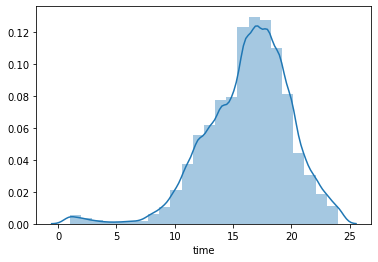

In [7]:
# Plot the percentage distribution of the amount of which the value of the time_gap_btwn variable is less than 2 seconds 
# in each hourly divided time interval
sns.distplot(df1['time'],bins=24)

Fig 1: Distribution of time_gap_btwn variable <= 2 seconds in each hourly divided time interval

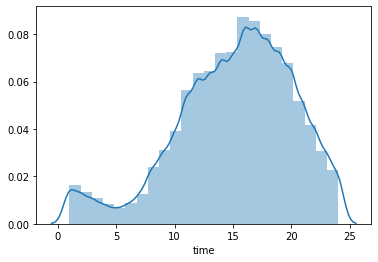

In [8]:
sns.distplot(df2['time'],bins=24)

Fig 2: Distribution of time_gap_btwn variable > 2 seconds in each hourly divided time interval

### How would the road conditions affect drivers’ aggressiveness?

In [9]:
pd.value_counts(df.precipitation_typ)

clear    148947
snow       5859
rain       5305
Name: precipitation_typ, dtype: int64

In [10]:
df_clear = df[(df.precipitation_typ == 'clear')]
df_clear.head()

,ID,DrivingStyle,time_gap_btwn,date_time,len_cm,weight_kg,no_axles,rd_lane,speed_kph,preceding_vehi_id,...,len_preceding_vehi_cm,air_temp,precipitation_typ,precipitation_intensity,rel_humid,wind_dir,wind_speed_ms,rd_cond,light_cond,time
0,DR_24526,2,94.0,2012-03-21 09:14:55,1265,10243,2,1,81,57227,...,941,7.0,clear,None,95.0,146.0,1.0,Dry,daylight,10
1,DR_24526,2,11.0,2012-03-21 09:15:07,1265,10243,2,1,88,57229,...,551,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
2,DR_24526,2,4.0,2012-03-21 09:15:12,1265,10243,2,1,88,57230,...,1698,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
3,DR_24526,2,127.0,2012-03-21 09:15:48,1265,10243,2,2,84,57228,...,544,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10
4,DR_24526,2,42.0,2012-03-21 09:15:54,1265,10243,2,1,89,57231,...,1893,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,10


In [11]:
pd.value_counts(df_clear.DrivingStyle) #Types of Drivers during daylight
#Normal Drivers drive during the daylight obviously

2    79203
3    46689
1    23055
Name: DrivingStyle, dtype: int64

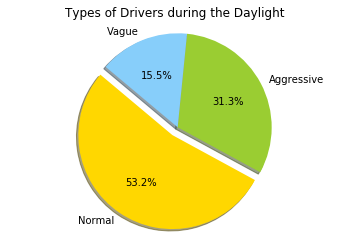

In [12]:
labels = 'Normal', 'Aggressive', 'Vague',
sizes = [79203, 46689, 23055]
colors = ['gold', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0,)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Types of Drivers during the Daylight')
plt.show()

Fig 3: Daylight: When there is daylight out, we can see that a majority of drivers drive normally, but we do see 31% drive aggressively.

In [13]:
df_snow = df[(df.precipitation_typ == 'snow')]
df_snow.head()

,ID,DrivingStyle,time_gap_btwn,date_time,len_cm,weight_kg,no_axles,rd_lane,speed_kph,preceding_vehi_id,...,len_preceding_vehi_cm,air_temp,precipitation_typ,precipitation_intensity,rel_humid,wind_dir,wind_speed_ms,rd_cond,light_cond,time
877,DR_25024,2,30.0,2012-03-23 10:44:58,555,2692,2,1,81,60097,...,1709,NaN,snow,,NaN,NaN,NaN,Dry,daylight,11
878,DR_25024,2,253.0,2012-03-23 10:47:24,555,2692,2,2,85,60093,...,649,NaN,snow,,NaN,NaN,NaN,Dry,daylight,11
879,DR_25024,2,3.0,2012-03-23 10:47:28,555,2692,2,2,78,60099,...,526,NaN,snow,,NaN,NaN,NaN,Dry,daylight,11
880,DR_25024,2,245.0,2012-03-23 10:49:03,555,2692,2,1,78,60098,...,523,NaN,snow,,NaN,NaN,NaN,Dry,daylight,11
881,DR_25024,2,2.0,2012-03-23 10:49:06,555,2692,2,1,76,60101,...,552,NaN,snow,,NaN,NaN,NaN,Dry,daylight,11


In [14]:
pd.value_counts(df_snow.DrivingStyle) #Types of Drivers during snow
#Normal Drivers drive in the snow 

2    3596
1    1183
3    1080
Name: DrivingStyle, dtype: int64

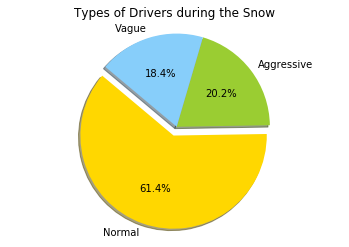

In [15]:
labels = 'Normal', 'Aggressive', 'Vague',
sizes = [3596, 1183, 1080]
colors = ['gold', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0,)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Types of Drivers during the Snow')
plt.show()

Fig 4: During the snow we see a lot more people drive normally and a 11% decrease in agressive drivers

In [16]:
df_rain = df[(df.precipitation_typ == 'rain')]
df_rain.head()

,ID,DrivingStyle,time_gap_btwn,date_time,len_cm,weight_kg,no_axles,rd_lane,speed_kph,preceding_vehi_id,...,len_preceding_vehi_cm,air_temp,precipitation_typ,precipitation_intensity,rel_humid,wind_dir,wind_speed_ms,rd_cond,light_cond,time
30,DR_40928,2,350.0,2012-03-21 09:46:16,936,3224,4,2,101,57260,...,1660,1.0,rain,Low,95.0,45.0,0.0,Dry,daylight,10
31,DR_40928,2,475.0,2012-03-21 09:46:48,936,3224,4,1,78,57258,...,557,1.0,rain,Low,95.0,45.0,0.0,Dry,daylight,10
32,DR_40928,2,102.0,2012-03-21 09:48:30,936,3224,4,1,84,57262,...,521,1.0,rain,Low,95.0,45.0,0.0,Dry,daylight,10
33,DR_40928,2,97.0,2012-03-21 09:50:07,936,3224,4,1,82,57263,...,510,1.0,rain,Low,95.0,45.0,0.0,Dry,daylight,10
34,DR_40928,2,3.0,2012-03-21 09:50:12,936,3224,4,1,77,57264,...,1706,1.0,rain,Low,95.0,45.0,0.0,Dry,daylight,10


In [17]:
pd.value_counts(df_rain.DrivingStyle) #Drivers during the rain
#Normal Drivers in the rain 
#You see some of the most aggressive drivers during the rain

2    2298
1    1555
3    1452
Name: DrivingStyle, dtype: int64

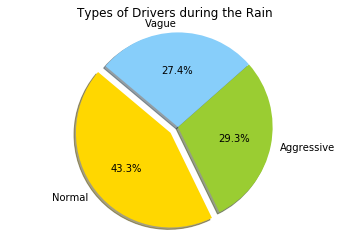

In [18]:
labels = 'Normal', 'Aggressive', 'Vague',
sizes = [2298, 1555, 1452]
colors = ['gold', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0,)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Types of Drivers during the Rain')
plt.show()

Fig 5: During the rain we see a majority drive normally; however compared to snow, we see a 9% increase in agressive drivers

### How would preceding vehicles affect drivers’ aggressiveness?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A4C39B048>,
      dtype=object)

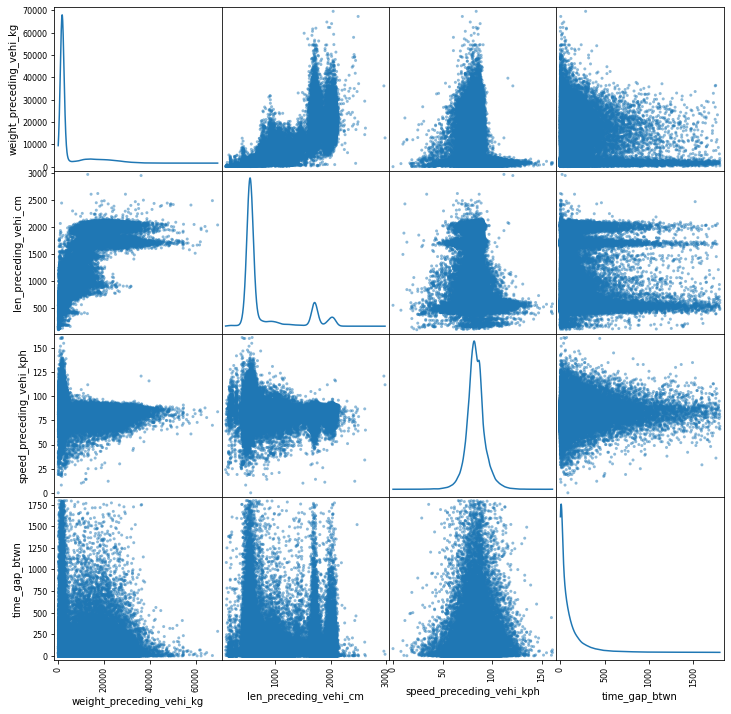

In [19]:
scatter_matrix(df[{'time_gap_btwn', 'speed_preceding_vehi_kph', 'weight_preceding_vehi_kg', 'len_preceding_vehi_cm'}], figsize=(12,12),diagonal='kde')

Fig 6: Scatter matrix of time gap, speed, weight, and length before identifying aggressive drivers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A51F88908>,
      dtype=object)

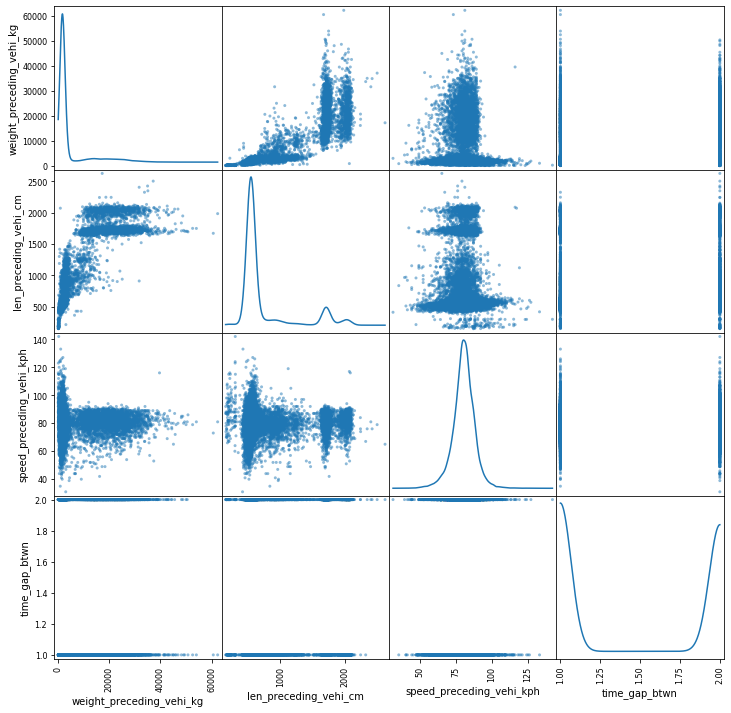

In [20]:
scatter_matrix(df1[{'time_gap_btwn', 'speed_preceding_vehi_kph', 'weight_preceding_vehi_kg', 'len_preceding_vehi_cm'}], figsize=(12,12),diagonal='kde')

Fig 7: Scatter matrix of time gap, speed, weight, and length for unaggressive drivers (time_gap_btwn <= 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A4C5BE708>,
      dtype=object)

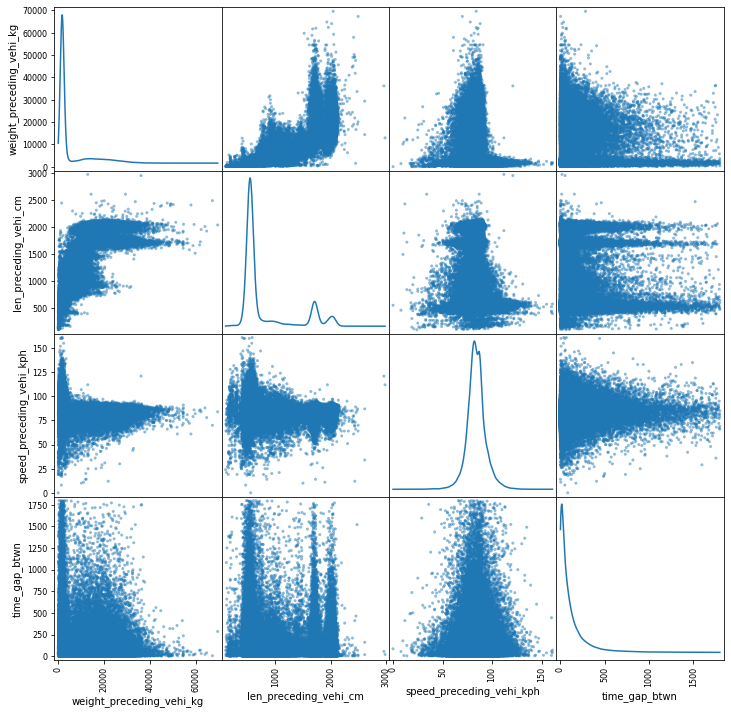

In [21]:
scatter_matrix(df2[{'time_gap_btwn', 'speed_preceding_vehi_kph', 'weight_preceding_vehi_kg', 'len_preceding_vehi_cm'}], figsize=(12,12),diagonal='kde')

Fig 8: Scatter matrix of time gap, speed, weight, and length for unaggressive drivers (time_gap_btwn > 2)

In [22]:
#Identify the roles speed, weight, and length of preceding vehicles play on drivers' aggresiveness
#through linear regression.
outcome, predictors = patsy.dmatrices('time_gap_btwn ~ speed_preceding_vehi_kph + weight_preceding_vehi_kg + len_preceding_vehi_cm', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          time_gap_btwn   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     432.0
Date:                Thu, 19 Mar 2020   Prob (F-statistic):          1.58e-279
Time:                        22:27:11   Log-Likelihood:            -1.0555e+06
No. Observations:              160111   AIC:                         2.111e+06
Df Residuals:                  160107   BIC:                         2.111e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

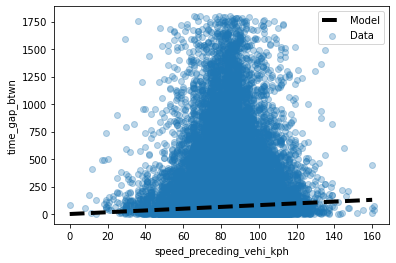

In [23]:
# For Speed:

# Plot the orginal data (as before)
plt.scatter(df['speed_preceding_vehi_kph'], df['time_gap_btwn'], alpha=0.3, label = 'Data');

# Generate and plot the model fit line
xs = np.arange(df['speed_preceding_vehi_kph'].min(), df['speed_preceding_vehi_kph'].max())
ys = 0.8065 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.ylabel('time_gap_btwn')
plt.xlabel('speed_preceding_vehi_kph')
plt.legend();

Fig 9: Scatter plot with model fit line for time gap and speed

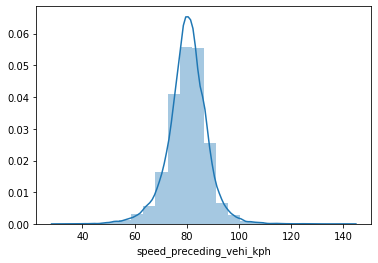

In [24]:
sns.distplot(df1['speed_preceding_vehi_kph'],bins=24)

Fig 10: Distribution of the speed of preceding vehicles for aggressive drivers

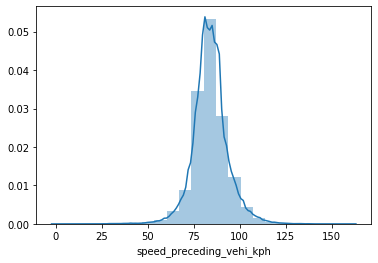

In [25]:
sns.distplot(df2['speed_preceding_vehi_kph'],bins=24)

Fig 11: Distribution of the speed of preceding vehicles for unaggressive drivers

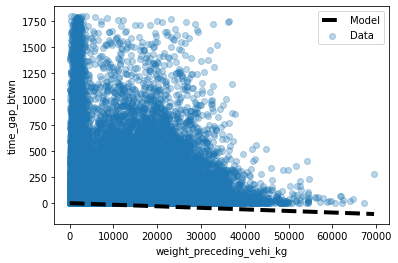

In [26]:
# For Weight:

# Plot the orginal data (as before)
plt.scatter(df['weight_preceding_vehi_kg'], df['time_gap_btwn'], alpha=0.3, label = 'Data');

# Generate and plot the model fit line
xs = np.arange(df['weight_preceding_vehi_kg'].min(), df['weight_preceding_vehi_kg'].max())
ys = -0.0015 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.ylabel('time_gap_btwn')
plt.xlabel('weight_preceding_vehi_kg')
plt.legend();

Fig 12: Scatter plot with model fit line for time gap and weight

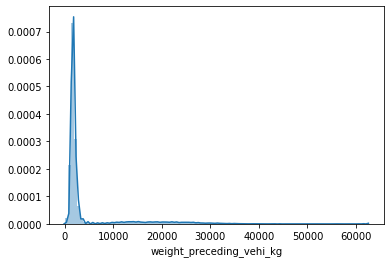

In [27]:
sns.distplot(df1['weight_preceding_vehi_kg'],bins=100)

Fig 13: Distribution of the weight of preceding vehicles for aggressive drivers

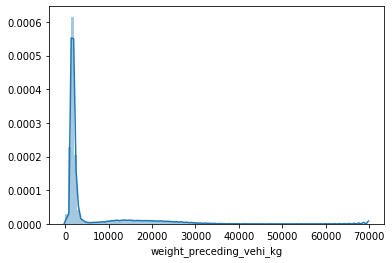

In [28]:
sns.distplot(df2['weight_preceding_vehi_kg'],bins=100)

Fig 14: Distribution of the weight of preceding vehicles for unaggressive drivers

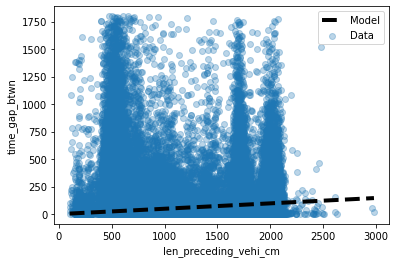

In [29]:
# For Length:

# Plot the orginal data (as before)
plt.scatter(df['len_preceding_vehi_cm'], df['time_gap_btwn'], alpha=0.3, label = 'Data');

# Generate and plot the model fit line
xs = np.arange(df['len_preceding_vehi_cm'].min(), df['len_preceding_vehi_cm'].max())
ys = 0.0489 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.ylabel('time_gap_btwn')
plt.xlabel('len_preceding_vehi_cm')
plt.legend();

Fig 15: Scatter plot with model fit line for time gap and length

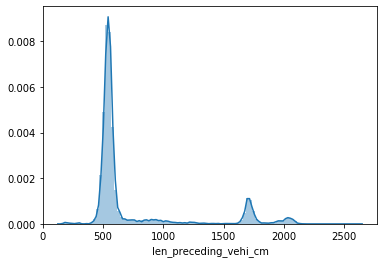

In [30]:
sns.distplot(df1['len_preceding_vehi_cm'],bins=100)

Fig 16: Distribution of the length of preceding vehicles for aggressive drivers

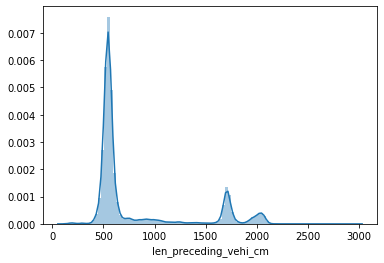

In [31]:
sns.distplot(df2['len_preceding_vehi_cm'],bins=100)

Fig 17: Distribution of the length of preceding vehicles for unaggressive drivers

## Ethics & Privacy
When conducting a project like this one it is important to recognize the ethics and privacy of the project. We chose a data set on Kaggle, which means by downloading the dataset, we were given permission to use the data set. In Kaggle's Terms, it states by uploading a dataset to Public User Submission 'then you grant Kaggle the license stated in the second paragraph of this Section 9... making that Public User Submission accessible to all Kaggle users and providing the Services necessary to do so, as well as all other rights necessary to use and exercise all rights in that Public User Submission in connection with the Services for any purpose.' For the actual dataset, all the identities of the people recorded are kept anonymous to ensure privacy. When recording the data, it does not specify where the data was collected, which is both advantageous and disadvantageous. The geographical anonymity of the data is beneficial because it protects the people's identities and creates randomness within the data, which may imply variability from locations all over the world. By increasing variability in data, we may be able to suggest stronger claims and increase generalizability. This can also be disadvantageous, however, because there could be some bias in terms of geographical representation within the data, and we thus cannot double-check since we may lack information to identify it. 

Our study aims to inform readers of the dangers in the discovered patterns associated with aggressive driving. The variables measured -- the time of day, vehicle speed, and weather conditions -- do not implicate any potential privacy concerns for any individuals within this data. Since the the regions from which our data is collected is not specified, this may bias the data in a way that excludes external factors that affect aggressive driving. For example, if the data was collected primarily from neighborhoods where people consume alcohol significantly more than average, this external factor may increase the likelihood of aggressive driving behavior, skewing the results and decreasing generalizability. To deal with this problem, it is possible to select data during the morning and at noon, when there is a lower incidence of drunk driving.

In terms of privacy, each observation is assigned a unique identification number. The variables, therefore, do not expose any private information related to name, geographical information, age, gender, etc. Since the data we intend to focus on is anonymized, it presents a low risk for excluding particular populations and reflecting problematic biases. Our investigation emphasizes external and environmental factors that affect driving patterns to avoid claims that segment particular groups. Through a focus on several environmental variables that influence driving, we avoid falling victim to Goodhart’s Law, in which readers may isolate a particular condition as primarily important and dangerously neglect other equally crucial factors. We hope to continuously monitor updates in the dataset and our model to ensure our presentation accurately reflects current driving patterns.



## Conclusion & Discussion
The first hypothesis, we tried to find at what time of a day will drivers conduct aggrssive driving. In order to find the result, we first categorized the original dataframe into 2 dataframes by the gap time between 2 vehicles, and then print out the histograms for each dataframe. From fig 1, we can tell that from 15:00 to 20:00, there are significant amount of drivers who conducting aggressive driving and by fig 2, people tend to act safely from 0:00 to 5:00. The time span from 15:00 to 20:00 may be the reason for the aggressive driving style because people may hurry back home after work. However, the evident peak in fig 1 might also be caused for reasons other than hurrying back home. For example, the time span from 15:00 to 20:00 is the regular commuting time. The heavy traffic could lead to the relatively larger sample size, which could also explain why there is a peak.

The second hypothesis we sought to answer was how road conditions affected driver's aggressiveness. In order to do this we seperated dataframes into three different datasets based on the precipitation_type column. There was three possible outcomes in the percipitation type: clear, snow, and rain. Once we seperated each of these three types into three different dataframes, we were able to check what types of driver drive during those conditions using value_counts. After determining what types of drivers are driving during the condition we transformed that information into a pie chart that will make the data a lot easier to see. From the data we can see that a majority of drivers in all three conditions drive normally, which makes sense because in no matter what condition a lot of people drive safely. However, with this data we can also see when most aggressive drivers drive which is important to know for safety reasons. Based of the data we see that a majority of aggressive drivers drive during clear skies with a 31.4%. The next condition that wields a good amount of agressive drivers is the rain with a 29.3%. Finally, we see that in the snow 20.2% of drivers drive agressively. From this information we reccomend that people be extra cautious during the rain during the snow since there is a lot more aggressive drivers in the rain.

For the third hypothesis, we tried to figure out the relatin between the traits of the preceding cars and drivers' aggressiveness, namely speed, weight, and length. We drew scatter plots with prediction lines and bar plots for data visualization to give a clear view of the significance and distribution. In the regression analysis table, we found that the weight was positively correlated with aggresiveness, and speed and length were negatively correlated. The P-values for all three variables were less than 0.05, meaning they are all significant enough to reject the "does-not-matter" null hypothesis. However, after taking a closer look, we realized the R-squared value was merely 0.008, which indicated only 8% of the variance in this case was explained by our variables - there are a lot of other factors that may affect drivers' aggressiveness. This is certainly a limitation. To make sure the indication was true, we presented the distribution of drivers with and without the attitude of aggression (time gap between preceding car <= 2 seconds and > 2 seconds) via bar plots and attempted to make comparisons. We ploted on speed, weight and length of the preceding cars and found out that the distribution was roughly the same, proving that though they do have impact on drivers' aggressiveness, their influence is not that huge. Since the speed of preceding vehicles has the largest coefficient among the three, our research could help future policy makers think a bit more about traffic conjestion and speed limit on roads and highways. The society should also work together against overloading for the sake of safety of the public.



## Team Contributions
* Yihao Zhou - Data Cleaning/Pre-processing Hypothesis 1 Visualization, EDA, Text
* Miguel Silva - Data Cleaning/Pre-processing Hypothesis 2 Visualization, EDA, Text
* Zhiyang Han - Data Cleaning/Pre-processing Hypothesis 3 Visualization, EDA, Text
* Robert Brooks - Text Writing and Editing
* Elliot Ettore - Text Writing and Editing